# Flight Price:
#   Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [1]:
import pandas as pd
dataset_path = 'flight_price.csv'
# Load the dataset into a Pandas DataFrame
df = pd.read_csv(dataset_path)
# Get the dimensions of the dataset
num_rows, num_columns = df.shape
# Print the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 2671
Number of columns: 11


# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

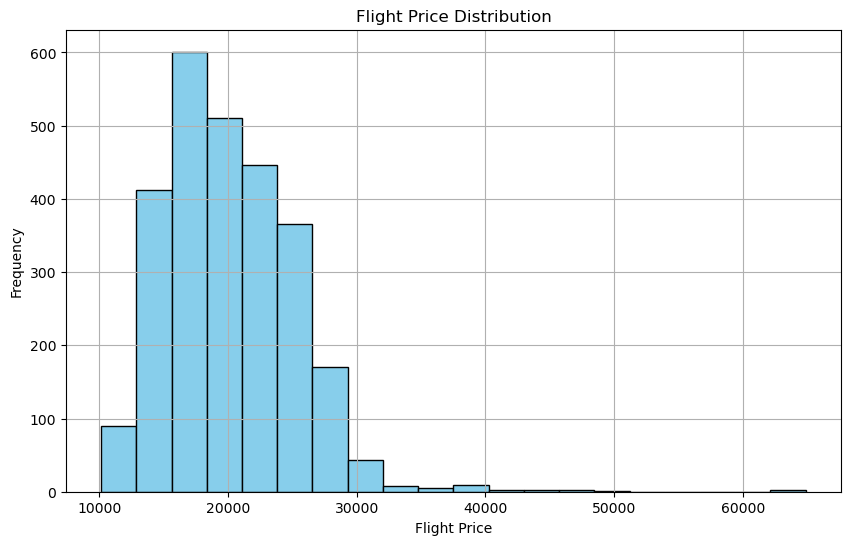

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
dataset_path = 'flight_price.csv'
# Load the dataset into a Pandas DataFrame
df = pd.read_csv(dataset_path)
# Extract the 'flight_price' column
flight_prices = df['Price']
# Create a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(flight_prices, bins=20, color='skyblue', edgecolor='black')
plt.title('Flight Price Distribution')
plt.xlabel('Flight Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [5]:
import pandas as pd
dataset_path = 'flight_price.csv'
# Load the dataset into a Pandas DataFrame
df = pd.read_csv(dataset_path)
# Extract the 'flight_price' column (adjust the column name according to your dataset)
flight_prices = df['Price']
# Calculate the minimum and maximum prices
min_price = flight_prices.min()
max_price = flight_prices.max()
# Calculate the range
price_range = max_price - min_price
print(f"Minimum Price:{min_price}")
print(f"Maximum Price:{max_price}")
print(f"Price Range:{price_range}")


Minimum Price:10138
Maximum Price:64881
Price Range:54743


# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

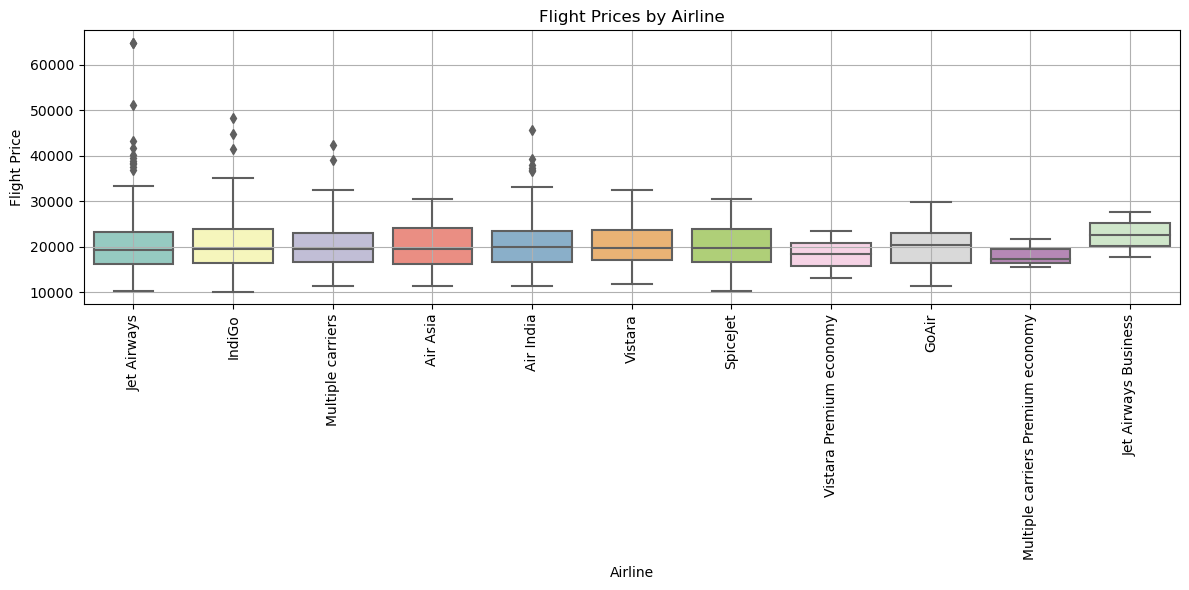

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
dataset_path = 'flight_price.csv'

df = pd.read_csv(dataset_path)
# Create a boxplot to compare prices by airline
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

airline_column = 'Airline'
price_column = 'Price'

import seaborn as sns

sns.boxplot(x=airline_column, y=price_column, data=df, palette='Set3')

plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Flight Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

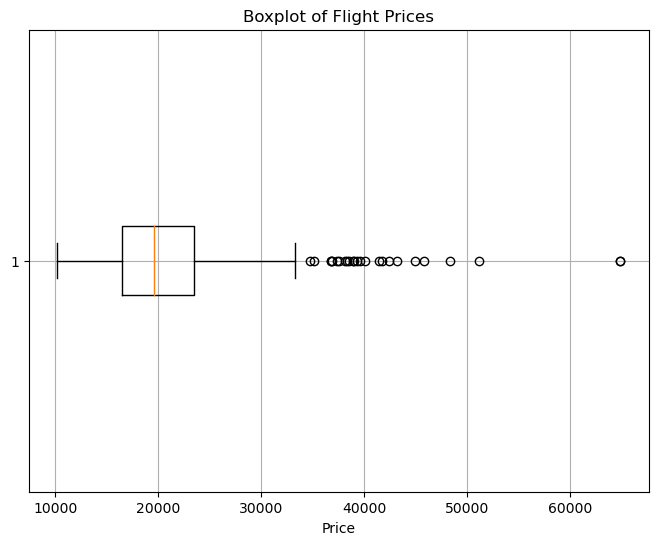

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

dataset_path = 'flight_price.csv'

df = pd.read_csv(dataset_path)

price_column = 'Price'  
# Create a boxplot to identify potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df[price_column], vert=False)
plt.title('Boxplot of Flight Prices')
plt.xlabel('Price')
plt.grid(True)
plt.show()

# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

/tmp/ipykernel_95/2936640665.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])


ValueError: setting an array element with a sequence.

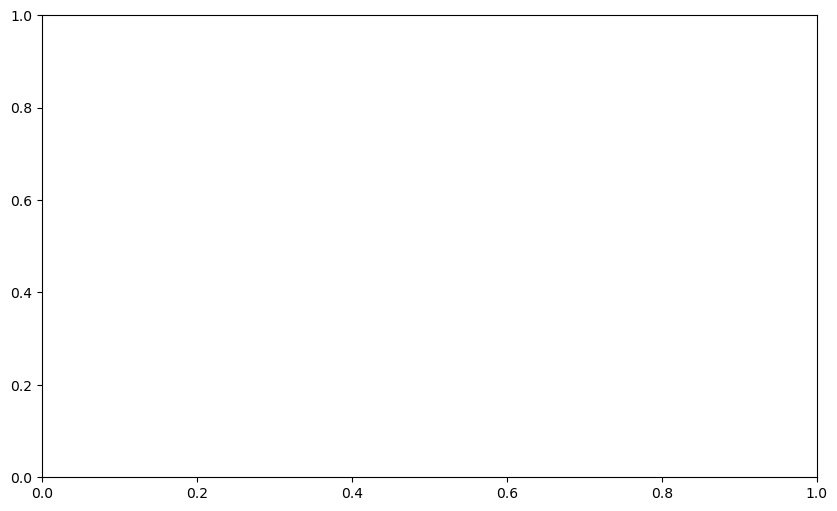

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('flight_price.csv')

# Convert the 'date' column to a datetime data type if it's not already
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

# Extract month and year from the 'date' column
df['year'] = df['Date_of_Journey'].dt
df['month'] = df['Date_of_Journey'].dt

# Calculate the average flight price for each month
monthly_avg_prices = df.groupby(['year', 'month'])['Price'].mean()

# Find the peak travel season (month with the highest average price)
peak_season = monthly_avg_prices.idxmax()
peak_month, peak_year = peak_season[1], peak_season[0]

# Create a line plot to visualize monthly average prices
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_prices.index, monthly_avg_prices.values, marker='o', linestyle='-')
plt.title('Monthly Average Flight Prices')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Highlight the peak travel season
plt.annotate(f'Peak Season ({peak_month}/{peak_year})', xy=(peak_month, monthly_avg_prices[peak_year, peak_month]), xytext=(4, 20),
             textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))

plt.show()

# Print the identified peak travel season
print(f"The peak travel season is in {peak_month}/{peak_year}.")


# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

/tmp/ipykernel_95/1995357103.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])


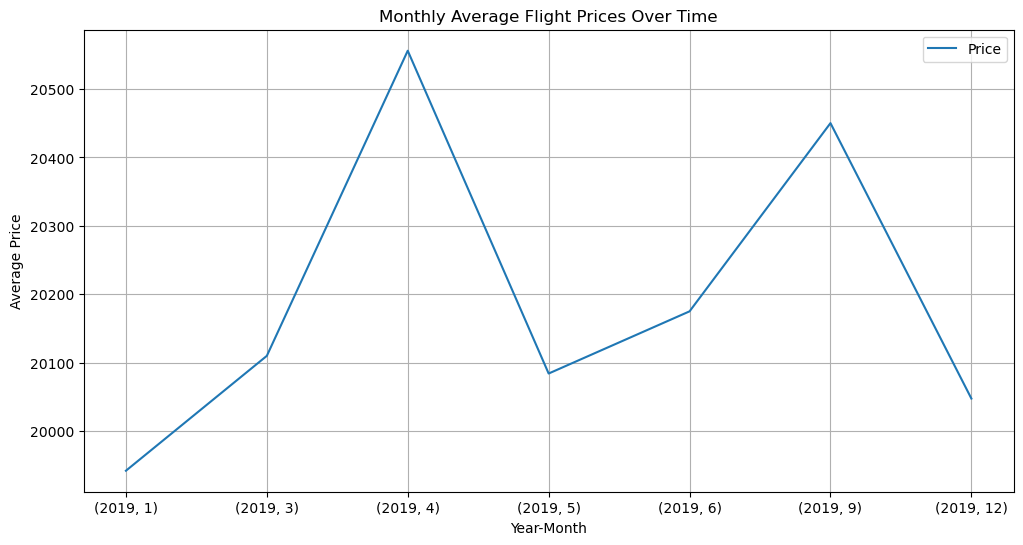

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('flight_price.csv')

df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

# Extract year and month from the 'date' column
df['year'] = df['Date_of_Journey'].dt.year
df['month'] = df['Date_of_Journey'].dt.month

# Group data by year and month to calculate average flight prices
monthly_avg_prices = df.groupby(['year', 'month'])['Price'].mean()

# Create a line plot to visualize monthly average prices over time
plt.figure(figsize=(12, 6))
monthly_avg_prices.plot(legend=True)
plt.title('Monthly Average Flight Prices Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

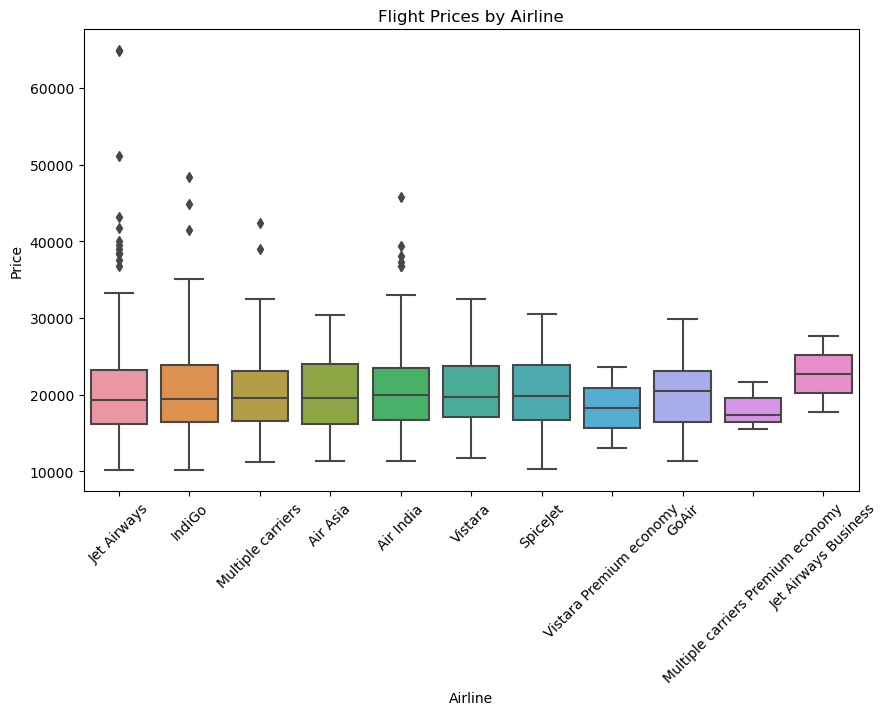

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('flight_price.csv')

# Example: EDA - Visualize price variations by airline
plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline')
plt.xticks(rotation=45)
plt.show()

# Google Playstore:
# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# Get the dimensions (number of rows and columns) of the dataset
num_rows, num_columns = df.shape
# Print the dimensions
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 10841
Number of columns: 13


# Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

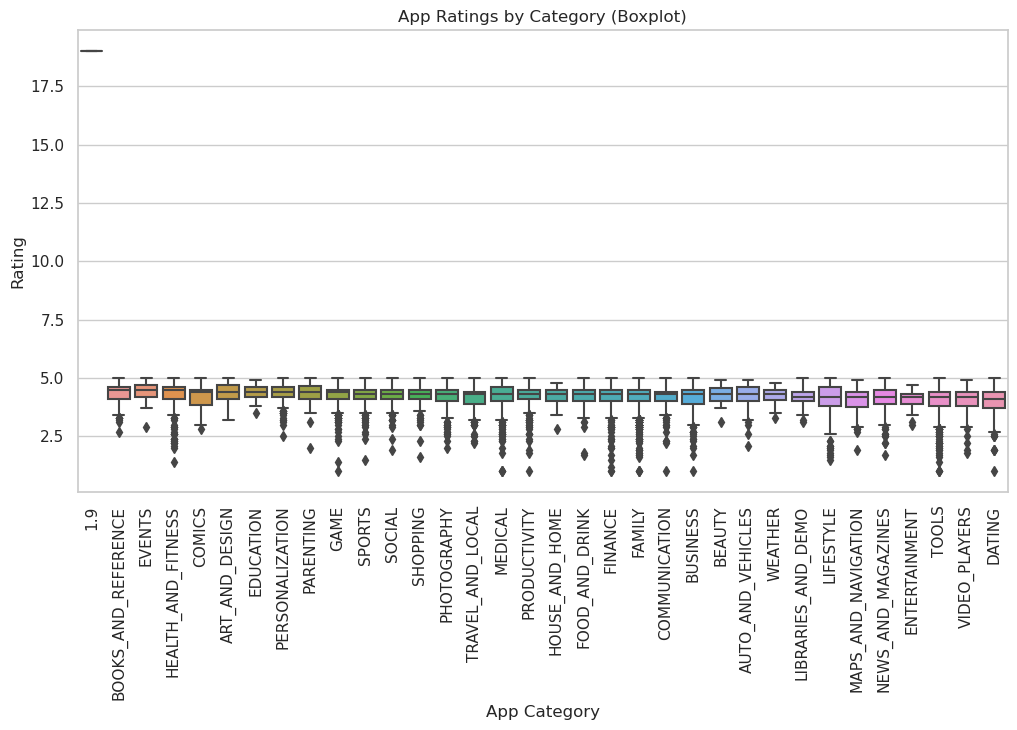

In [10]:
# Group the data by 'Category' and calculate the median rating for each category
category_ratings = df.groupby('Category')['Rating'].median().reset_index()
# Sort the categories by median rating
category_ratings = category_ratings.sort_values(by='Rating', ascending=False)
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a boxplot using Seaborn
sns.set(style="whitegrid")
sns.boxplot(x='Category', y='Rating', data=df, order=category_ratings['Category'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Set labels and title
plt.xlabel('App Category')
plt.ylabel('Rating')
plt.title('App Ratings by Category (Boxplot)')

# Show the plot
plt.show()

# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [11]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
# Display missing value counts and percentages for each column
total_rows = df.shape[0]
missing_percentage = (missing_values / total_rows) * 100
# Create a DataFrame to display missing values information
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
missing_info = missing_info[missing_info['Missing Values'] > 0]  # Filter columns with missing values
# Display the columns with missing values
print("Columns with missing values:")
print(missing_info)

Columns with missing values:
                Missing Values  Missing Percentage
Rating                    1474           13.596532
Type                         1            0.009224
Content Rating               1            0.009224
Current Ver                  8            0.073794
Android Ver                  3            0.027673


Missing values can impact our analysis in several ways:

1. Data Integrity: Missing data can lead to a loss of data integrity and may affect the accuracy of your analysis.
2. Biased Results: If missing data is not handled properly, it can lead to biased or skewed results, especially if the missing data is not missing completely at random (MCAR).
3. Reduced Sample Size: Missing values can reduce the effective sample size, potentially reducing the power of statistical tests or machine learning models.
4. Data Imputation: Depending on the nature and extent of missing data, you may need to impute (fill in) missing values using appropriate techniques. This can introduce uncertainty and assumptions into your analysis.
5. Visualization: Missing values can affect data visualization, making it challenging to create accurate visualizations without addressing missing data.

# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [18]:
df['Size'].unique()

array([1.90e+07, 1.40e+07, 8.70e+06, 2.50e+07, 2.80e+06, 5.60e+06,
       2.90e+07, 3.30e+07, 3.10e+06, 2.80e+07, 1.20e+07, 2.00e+07,
       2.10e+07, 3.70e+07, 2.70e+06, 5.50e+06, 1.70e+07, 3.90e+07,
       3.10e+07, 4.20e+06, 2.30e+07, 6.00e+06, 6.10e+06, 4.60e+06,
       9.20e+06, 5.20e+06, 1.10e+07, 2.40e+07, 0.00e+00, 9.40e+06,
       1.50e+07, 1.00e+07, 1.20e+06, 2.60e+07, 8.00e+06, 7.90e+06,
       5.60e+07, 5.70e+07, 3.50e+07, 5.40e+07, 2.01e+05, 3.60e+06,
       5.70e+06, 8.60e+06, 2.40e+06, 2.70e+07, 2.50e+06, 7.00e+06,
       1.60e+07, 3.40e+06, 8.90e+06, 3.90e+06, 2.90e+06, 3.80e+07,
       3.20e+07, 5.40e+06, 1.80e+07, 1.10e+06, 2.20e+06, 4.50e+06,
       9.80e+06, 5.20e+07, 9.00e+06, 6.70e+06, 3.00e+07, 2.60e+06,
       7.10e+06, 2.20e+07, 6.40e+06, 3.20e+06, 8.20e+06, 4.90e+06,
       9.50e+06, 5.00e+06, 5.90e+06, 1.30e+07, 7.30e+07, 6.80e+06,
       3.50e+06, 4.00e+06, 2.30e+06, 2.10e+06, 4.20e+07, 9.10e+06,
       5.50e+07, 2.30e+04, 7.30e+06, 6.50e+06, 1.50e+06, 7.50e

In [19]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,  3. ,
        1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,  1.8,
        2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

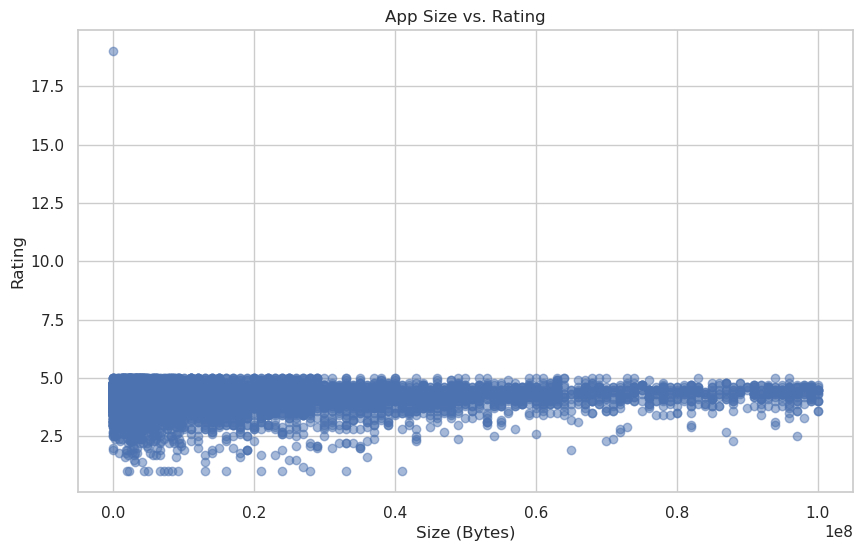

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Size'], df['Rating'], alpha=0.5)
plt.title('App Size vs. Rating')
plt.xlabel('Size (Bytes)')
plt.ylabel('Rating')
# Show the plot
plt.show()

# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [24]:
# Create a frequency table of app installations (Installs column)
install_freq_table = df['Installs'].value_counts().reset_index()

# Rename the columns for clarity
install_freq_table.columns = ['Installs', 'Frequency']

# Sort the frequency table by the number of installations in descending order
install_freq_table = install_freq_table.sort_values(by='Frequency', ascending=False)

# Display the top 10 most popular apps by number of installations
top_10_popular_apps = install_freq_table.head(10)
print(top_10_popular_apps)

       Installs  Frequency
0    1,000,000+       1577
1   10,000,000+       1252
2      100,000+       1150
3       10,000+       1010
4    5,000,000+        752
5        1,000+        713
6      500,000+        538
7       50,000+        467
8        5,000+        432
9  100,000,000+        409


# Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

In [25]:
# Group the data by 'Category' and calculate popularity metrics (e.g., total installs)
category_popularity = df.groupby('Category')['Installs'].sum().reset_index()

# Sort the categories by popularity (total installs) in descending order
category_popularity = category_popularity.sort_values(by='Installs', ascending=False)


In [40]:
import matplotlib.pyplot as plt

# Create a bar chart to visualize app category popularity
plt.figure(figsize=(12,6))
plt.bar(category_popularity['Category'], category_popularity['Installs'], color='skyblue')
plt.title('App Category Popularity on Google Playstore')
plt.xlabel('App Category')
plt.ylabel('Total Installs (in Billions)')  # Adjust units as needed
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


ValueError: Image size of 132973x730 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x600 with 1 Axes>

# Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

# Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?